# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [39]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import keras
import joblib
from keras import layers
from keras.utils import np_utils, get_file
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, OneClassSVM 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint, EarlyStopping

### Utilities

In [15]:
def show_results(y_true,y_pred):
    print('=============Results=============')
    print("Accuracy => ", metrics.accuracy_score(y_true, y_pred))
    print("Precision => ",metrics.precision_score(y_true, y_pred, pos_label=None, sample_weight=None, average='weighted', zero_division=0, labels=np.unique(y_pred)))
    print('Mean Absolute Error =>', metrics.mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error =>', metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error =>', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print('Classification Matrix :')
    print(confusion_matrix(y_true,y_pred))
    print('Classification Report :')
    print(classification_report(y_true,y_pred))
    print('=================================')

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [3]:
dataDir = 'data/raw_data_22_12.csv' # remove before push
data = pd.read_csv(dataDir)

best_columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure']

X = data[best_columns]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123) #shuffle=true by default

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9409, 6)
(9409, 1)
(6586, 6)
(2823, 6)
(6586, 1)
(2823, 1)


(8698, 13)
(572, 13)


Normal Situation captures:  8698
Anomalous Situation captures:  572


        sensors.id  sensors.pm25  sensors.pm10  sensors.temperature  \
count   572.000000    572.000000    572.000000           572.000000   
mean   1932.447552    459.759266    838.128147            18.381013   
std     348.650095    229.944000    490.604227             2.270935   
min     494.000000     14.300000     24.100000            11.200313   
25%    1826.750000    257.800000    514.100000            17.226777   
50%    1985.500000    442.400000    698.800000            18.530000   
75%    2140.250000    616.300000   1154.200000            19.545771   
max    2316.000000    999.900000   1999.900000            24.750508   

        sensors.gas  sensors.humidity  sensors.pressure  sensors.altitude  \
count    572.000000        572.000000        572.000000        572.000000   
mean   26322.015734         60.075454       1009.522151         31.382770   
std    11487.338536          5.39468

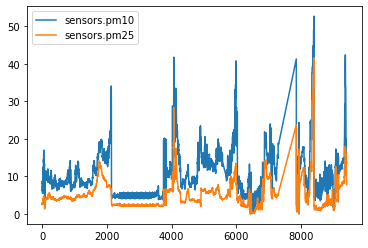

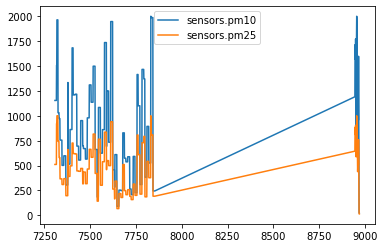

In [4]:
#Observação de dados
x0 = data.loc[data['sensors.classification'] == 0]
x1 = data.loc[data['sensors.classification'] == 1]


print(x0.shape)
print(x1.shape)
print('\n')

print("Normal Situation captures: ", x0.shape[0])
print("Anomalous Situation captures: ", x1.shape[0])
print('\n')

x0.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

x1.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

print(x1.describe())

## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"

#### SVM (Best Kernel)

In [5]:
# Prepare multiple classifiers with diferent kernels

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [6]:
# Train and Test each of the kernels
for i in range(4):
    svn = getClassifier(i)
    svn.fit(X_train, y_train.values.ravel())
    svn_y_pred = svn.predict(X_test)
    print('<<<<<<<<')
    print("Algorithm: SVM")
    print("Evaluation:", kernels[i], "kernel")
    show_results(y_test,y_pred=svn_y_pred)
    print('>>>>>>>>')
    print('\n')

<<<<<<<<
Algorithm: SVM
Evaluation: Polynomial kernel
=============Results=============
Accuracy =>  0.23817567567567569
Precision =>  0.23817567567567569
Mean Absolute Error => 0.7618243243243243
Mean Squared Error => 0.7618243243243243
Root Mean Squared Error => 0.8728254833151495
Classification Matrix :
[[  0 451]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.24      1.00      0.38       141

    accuracy                           0.24       592
   macro avg       0.12      0.50      0.19       592
weighted avg       0.06      0.24      0.09       592

>>>>>>>>


<<<<<<<<
Algorithm: SVM
Evaluation: RBF kernel
=============Results=============
Accuracy =>  0.7618243243243243
Precision =>  0.0
Mean Absolute Error => 0.23817567567567569
Mean Squared Error => 0.23817567567567569
Root Mean Squared Error => 0.48803245350660407
Classification Matrix :
[[451   0]
 [141   0

/Users/tiagofontes/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tiagofontes/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tiagofontes/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tiagofontes/opt

 kernel
=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592

>>>>>>>>




#### SVM Parameter Tuning - GridSearch

#### b. Model Trainig

In [7]:
#Implementing SVM with Grid Search for parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train.values.ravel())
print('Best parameters => ', grid.best_params_)

Best parameters =>  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


#### c. Output results

In [8]:
# Predition of the test sample
grid_pred = grid.predict(X_test)

In [9]:
show_results(y_true=y_test,y_pred=grid_pred)

=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [10]:
# Save the result of the gridsearch model which is the best

filename = 'model_saves/svm_gridsearch.sav'
pickle.dump(grid, open(filename, 'wb'))

In [11]:
filename = 'model_saves/svm_joblib.sav'
joblib.dump(grid, filename)

['model_saves/svm_joblib.pkl']

### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

In [37]:
num_classes = 1 # Number of classes right now (0-Normal,1-smoke)
y_train_nn = np.asarray(y_train)
y_test_nn = np.asarray(y_test)
print(X_train.shape)

(6586, 6)


#### b. Model Train and Results

In [31]:
# Model Build
nn = keras.Sequential()

nn.add(layers.Dense(128,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(16,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(num_classes,activation='sigmoid'))

# Model Compile
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.build()

# Model Summary
print(nn.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# Model Training 
epochs = 20
batch_size = 16
nn.fit(X_train, y_train_nn, validation_data = (X_test, y_test_nn), epochs = epochs, verbose = 2, batch_size=batch_size, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)])

Train on 6586 samples, validate on 2823 samples
Epoch 1/20
 - 1s - loss: 281.9845 - accuracy: 0.9059 - val_loss: -2.8109e+01 - val_accuracy: 0.8785
Epoch 2/20
 - 1s - loss: -2.2342e+01 - accuracy: 0.9516 - val_loss: -5.6912e+01 - val_accuracy: 0.9787
Epoch 3/20
 - 1s - loss: -5.4007e+01 - accuracy: 0.9561 - val_loss: -6.5448e+01 - val_accuracy: 0.9745
Epoch 4/20
 - 1s - loss: -1.0079e+02 - accuracy: 0.9619 - val_loss: -1.8856e+02 - val_accuracy: 0.8186
Epoch 5/20
 - 1s - loss: -1.7970e+02 - accuracy: 0.9625 - val_loss: -3.5014e+02 - val_accuracy: 0.8271
Epoch 6/20
 - 1s - loss: -3.5898e+02 - accuracy: 0.9564 - val_loss: -5.8389e+02 - val_accuracy: 0.9802
Epoch 7/20
 - 1s - loss: -7.0017e+02 - accuracy: 0.9642 - val_loss: -1.2169e+03 - val_accuracy: 0.9795
Epoch 8/20
 - 1s - loss: -1.3600e+03 - accuracy: 0.9645 - val_loss: -2.0920e+03 - val_accuracy: 0.9819
Epoch 9/20
 - 1s - loss: -2.4327e+03 - accuracy: 0.9636 - val_loss: -3.6578e+03 - val_accuracy: 0.9805
Epoch 10/20
 - 1s - loss: -3

In [33]:
# model testing
nn_y_pred = nn.predict(X_test).round()
print(nn_y_pred[:,0])

[0. 0. 0. ... 0. 0. 1.]


In [34]:
print("Algorithm: Keras Neural Network")
show_results(y_true=y_test,y_pred=nn_y_pred)

Algorithm: Keras Neural Network
=============Results=============
Accuracy =>  0.9705986539142756
Precision =>  0.9789460828021741
Mean Absolute Error => 0.04073680481756996
Mean Squared Error => 0.0683669854764435
Root Mean Squared Error => 0.2614708119015266
Classification Matrix :
[[2549   33    0    0    0]
 [   0  191    0    0    0]
 [   0   25    0    0    0]
 [   1   18    0    0    0]
 [   0    6    0    0    0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2582
           1       0.70      1.00      0.82       191
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         6

    accuracy                           0.97      2823
   macro avg       0.34      0.40      0.36      2823
weighted avg       0.96      0.97      0.96      2823



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### b. Model Train and Results - sklearn

In [47]:
#Param
mlp_gs = MLPClassifier(max_iter=10000)
parameter_space = {
    'hidden_layer_sizes': [(128,16,4),(6,6,4),(10,)],
    'activation': ['tanh', 'relu','sigmoid', 'softmax'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Model
sklNN = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=4)

#Train
sklNN.fit(X_train, y_train.values.ravel())
sklNN.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [48]:
sklNN_y_pred = sklNN.predict(X_test)
print(sklNN_y_pred)

[0 0 0 ... 0 0 1]


In [49]:
print("Algorithm: SK-Learn Neural Network")
show_results(y_true=y_test,y_pred=sklNN_y_pred)

Algorithm: SK-Learn Neural Network
=============Results=============
Accuracy =>  0.9606801275239107
Precision =>  0.970060589120997
Mean Absolute Error => 0.05100956429330499
Mean Squared Error => 0.085724406659582
Root Mean Squared Error => 0.29278730617904525
Classification Matrix :
[[2581    1    0    0    0]
 [  17  129   38    0    7]
 [   4   19    2    0    0]
 [   1    0   18    0    0]
 [   1    5    0    0    0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2582
           1       0.84      0.68      0.75       191
           2       0.03      0.08      0.05        25
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         6

    accuracy                           0.96      2823
   macro avg       0.37      0.35      0.36      2823
weighted avg       0.96      0.96      0.96      2823



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### d. Model Saving 

In [19]:
#Neural Network implementada
filename = 'model_saves/nn.hdf5'
#pickle.dump(nn, open(filename, 'wb'))
nn.save(filename)

In [44]:
#Neural Network sklearn
filename = 'model_saves/sklearn_nn.sav'
pickle.dump(sklNN, open(filename, 'wb'))

### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [40]:
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = StratifiedKFold(n_splits=4) #cross validation
gaussNB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv, 
                 verbose=0, 
                 scoring='accuracy') 

gaussNB.fit(X_train, y_train.values.ravel())

gaussNB.best_params_

{'var_smoothing': 4.3287612810830526e-08}

#### c. Output results

In [41]:
gaussNB_y_pred = gaussNB.predict(X_test)
print(gaussNB_y_pred)

[0 0 0 ... 0 0 1]


In [42]:
print("Algorithm: Naive Bayes")
show_results(y_true=y_test,y_pred=gaussNB_y_pred)

Algorithm: Naive Bayes
=============Results=============
Accuracy =>  0.9907899397803754
Precision =>  0.9906180088940735
Mean Absolute Error => 0.012398157987956075
Mean Squared Error => 0.02089975203684024
Root Mean Squared Error => 0.14456746534694534
Classification Matrix :
[[2579    3    0    0    0]
 [   1  184    6    0    0]
 [   0    9   15    1    0]
 [   1    3    0   15    0]
 [   0    2    0    0    4]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       0.92      0.96      0.94       191
           2       0.71      0.60      0.65        25
           3       0.94      0.79      0.86        19
           4       1.00      0.67      0.80         6

    accuracy                           0.99      2823
   macro avg       0.91      0.80      0.85      2823
weighted avg       0.99      0.99      0.99      2823



#### d. Model Saving 

In [17]:
filename = 'model_saves/gaussNB.sav'
pickle.dump(gaussNB, open(filename, 'wb'))

### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [43]:
#Param
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

#Model
rf = RandomForestClassifier()
randForestReg = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

#Train
randForestReg.fit(X_train, y_train.values.ravel())
randForestReg.best_params_

Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  8.3min finished


{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 20}

#### c. Output results

In [45]:
# Predictions in test dataset
randForestReg_y_pred = randForestReg.predict(X_test)
print(randForestReg_y_pred)

[0 0 0 ... 0 0 1]


In [46]:
print("Algorithm: Random Forest")
show_results(y_true=y_test,y_pred=randForestReg_y_pred)

Algorithm: Random Forest
=============Results=============
Accuracy =>  0.9989373007438895
Precision =>  0.9989491978488471
Mean Absolute Error => 0.001771165426850868
Mean Squared Error => 0.0038965639390719092
Root Mean Squared Error => 0.062422463417201896
Classification Matrix :
[[2582    0    0    0    0]
 [   1  189    1    0    0]
 [   0    0   25    0    0]
 [   0    0    0   19    0]
 [   0    1    0    0    5]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       0.99      0.99      0.99       191
           2       0.96      1.00      0.98        25
           3       1.00      1.00      1.00        19
           4       1.00      0.83      0.91         6

    accuracy                           1.00      2823
   macro avg       0.99      0.96      0.98      2823
weighted avg       1.00      1.00      1.00      2823



#### d. Model Saving 

In [21]:
filename = 'model_saves/randomforest.sav'
pickle.dump(randForestReg, open(filename, 'wb'))

## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [58]:
n_clusters = 4
kmeans = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 10000, n_init= 10, n_clusters = n_clusters, verbose = 0)
kmeans.fit(X_train)

KMeans(max_iter=10000, n_clusters=4)

#### c. Output results

In [51]:
kmeans_clusters = kmeans.cluster_centers_
print('Cluster Centers  => ', kmeans_clusters)
print('Train labels => ', kmeans.labels_)

Cluster Centers  =>  [[1.38676440e+02 2.66366470e+02 2.03225807e+01 2.86855281e+04
  5.68378032e+01 1.00526493e+03]
 [6.03064633e+00 1.15771242e+01 1.82623592e+01 1.59122839e+05
  5.54890623e+01 9.95898112e+02]
 [2.56671536e+01 6.45063148e+01 2.01322712e+01 6.20957455e+04
  5.45859353e+01 9.91391162e+02]
 [4.16076168e+00 8.83185228e+00 1.94668693e+01 1.26095213e+05
  5.72704770e+01 9.95519846e+02]]
Train labels =>  [2 1 0 ... 1 1 0]


In [52]:
kmeans_labels_test = kmeans.predict(X_test)
print('Test labels => ',kmeans_labels_test)

Test labels =>  [0 1 1 ... 1 1 0]


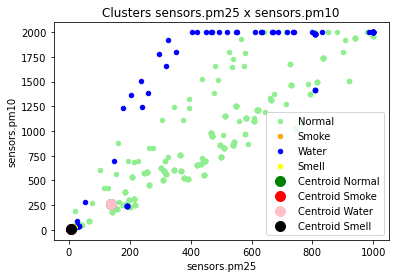

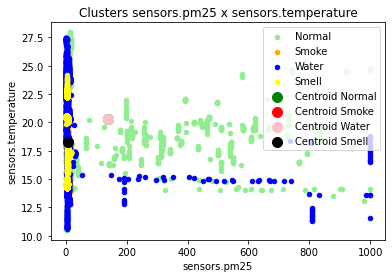

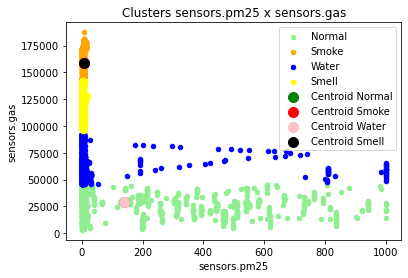

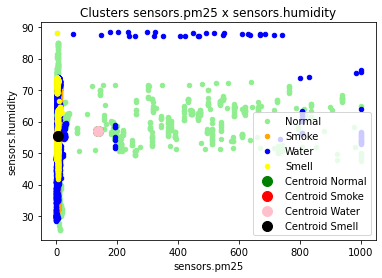

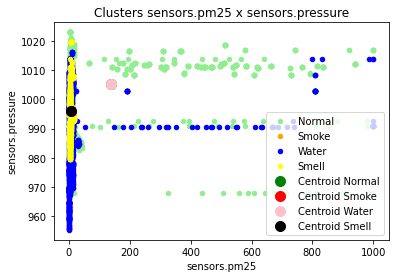

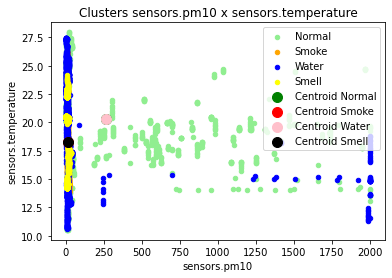

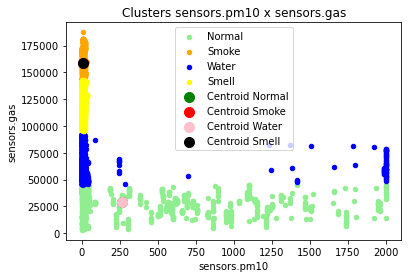

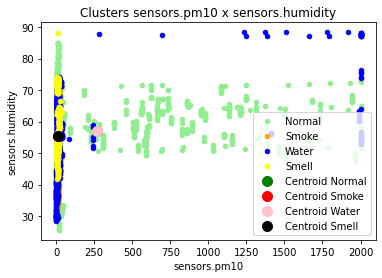

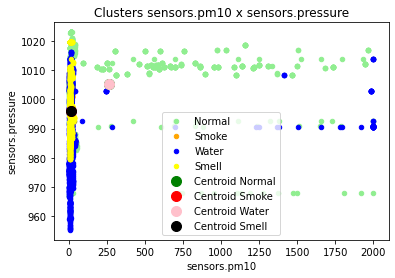

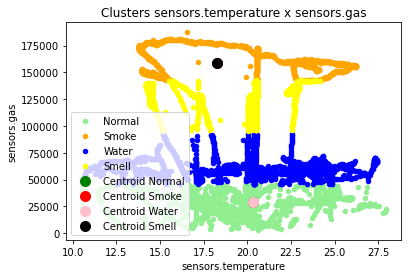

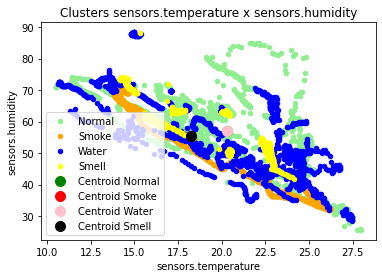

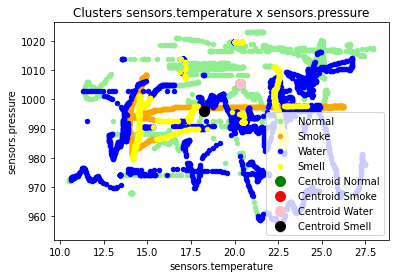

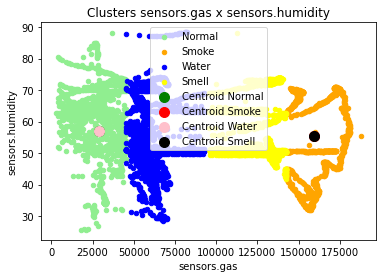

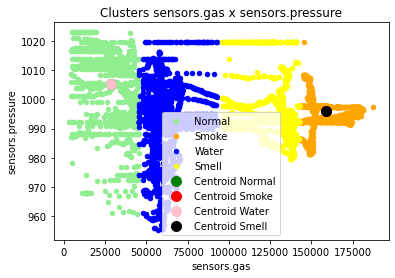

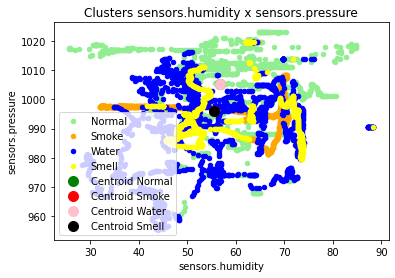

In [53]:
#Labels
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if( c1 >= c2):
            ;
        else:
            plt.scatter(X_train[kmeans.labels_ == 0][col1], X_train[kmeans.labels_ == 0][col2], s = 20, c = 'lightgreen', label = 'Normal')
            plt.scatter(X_train[kmeans.labels_ == 1][col1], X_train[kmeans.labels_ == 1][col2], s = 20, c = 'orange', label = 'Smoke')
            plt.scatter(X_train[kmeans.labels_ == 2][col1], X_train[kmeans.labels_ == 2][col2], s = 20, c = 'blue', label = 'Water')
            plt.scatter(X_train[kmeans.labels_ == 3][col1], X_train[kmeans.labels_ == 3][col2], s = 20, c = 'yellow', label = 'Smell')
            plt.scatter(kmeans_clusters[0, c1], kmeans_clusters[0, c2], s=100, c='green', label = 'Centroid Normal')
            plt.scatter(kmeans_clusters[1, c1], kmeans_clusters[1, c2], s=100, c='red', label = 'Centroid Smoke')
            plt.scatter(kmeans_clusters[0, c1], kmeans_clusters[0, c2], s=100, c='pink', label = 'Centroid Water')
            plt.scatter(kmeans_clusters[1, c1], kmeans_clusters[1, c2], s=100, c='black', label = 'Centroid Smell')
            plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

In [55]:
#Métricas para os dados de treino
print("Algorithm: K-Means Clustering")
print('Training data Accuracy :')
show_results(y_true=y_train,y_pred=kmeans.labels_)


Algorithm: K-Means Clustering
Training data Accuracy :
=============Results=============
Accuracy =>  0.14788946249620408
Precision =>  0.657317922771635
Mean Absolute Error => 1.70027330701488
Mean Squared Error => 3.933495293045855
Root Mean Squared Error => 1.9833041352868337
Classification Matrix :
[[ 956 1374 2052 1734    0]
 [ 361    0   20    0    0]
 [  23    0   17    0    0]
 [   4    0   28    1    0]
 [  10    0    5    1    0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.16      0.26      6116
           1       0.00      0.00      0.00       381
           2       0.01      0.42      0.02        40
           3       0.00      0.03      0.00        33
           4       0.00      0.00      0.00        16

    accuracy                           0.15      6586
   macro avg       0.14      0.12      0.05      6586
weighted avg       0.66      0.15      0.24      6586



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Previsoes dados de teste
print("Algorithm: K-Means Clustering")
print('Test data Accuracy :')
show_results(y_true=y_test,y_pred=kmeans_labels_test)

Algorithm: K-Means Clustering
Test data Accuracy :
=============Results=============
Accuracy =>  0.14806942968473255
Precision =>  0.6111573466266764
Mean Absolute Error => 1.675168260715551
Mean Squared Error => 3.85653560042508
Root Mean Squared Error => 1.963806406045433
Classification Matrix :
[[408 625 805 744   0]
 [184   0   7   0   0]
 [ 15   0  10   0   0]
 [  2   0  17   0   0]
 [  3   0   3   0   0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.67      0.16      0.26      2582
           1       0.00      0.00      0.00       191
           2       0.01      0.40      0.02        25
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         6

    accuracy                           0.15      2823
   macro avg       0.14      0.11      0.06      2823
weighted avg       0.61      0.15      0.23      2823



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### d. Model Saving 

In [59]:
filename = 'model_saves/kmeans.sav'
pickle.dump(kmeans, open(filename, 'wb'))

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

In [8]:
data0 = data[data['sensors.classification'] == 0]
data1 = data[data['sensors.classification'] == 1]
data1 = data1[data1['sensors.pm25'] >=400]
data1 = data1[:40]
contamination = data1.shape[0]/(data1.shape[0] + data0.shape[0])
lofDataset = shuffle(data0.append(data1))
Y_LofData = lofDataset['sensors.classification']
X_LofData = lofDataset.drop(['sensors.classification'],axis=1)
print(contamination)

0.026143790849673203


#### b. Model Trainig

In [9]:
n_neighbors = 100 # no sklearn diz que 20 é no geral um valor bom, mas podemos otimizar depois
metric = 'minkowski' #Euclid, Minkowski, Manhattan

localOutFact = LocalOutlierFactor(n_neighbors = n_neighbors, metric = metric, contamination = contamination)

In [10]:
# fit predict with train data
lof_train_pred = localOutFact.fit_predict(X_LofData)
#lof_test_pred = localOutFact.fit_predict(X_test)
print(lof_train_pred) #1 - inlier / -1 outlier

[1 1 1 ... 1 1 1]


#### c. Output results

In [11]:
#Notas:
#LOF(k) ~ 1 means Similar density as neighbors.
#LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
#LOF(k) > 1 means Lower density than neighbors (Outlier)
#Filtro dos outliers (valores negativos)
lof_OutId = np.where(lof_train_pred < 0)
lof_OutVal = X_LofData.iloc[lof_OutId]
print("----------------------------------------")
print(lof_OutId)
print("----------------------------------------")

----------------------------------------
(array([  92,   97,  152,  226,  237,  242,  270,  287,  322,  344,  360,
        378,  476,  506,  550,  551,  574,  577,  585,  587,  658,  681,
        734,  764,  777,  842,  843,  857, 1001, 1132, 1238, 1312, 1371,
       1388, 1431, 1444, 1451, 1466, 1495, 1518]),)
----------------------------------------


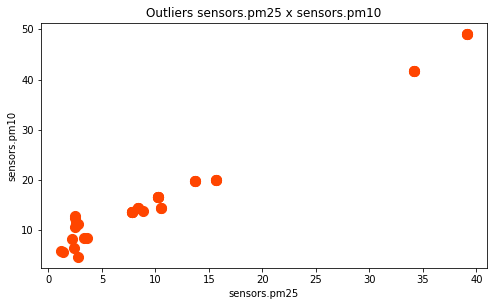

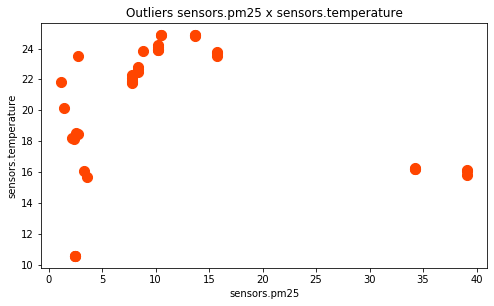

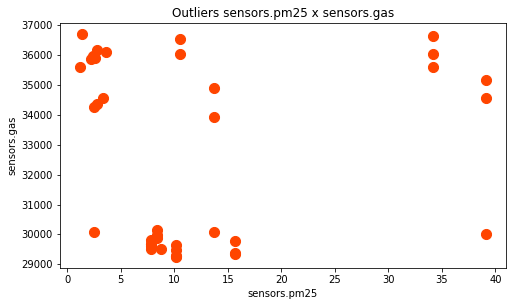

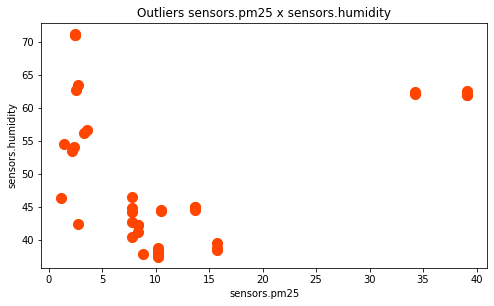

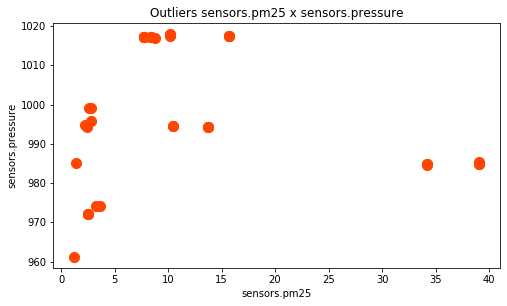

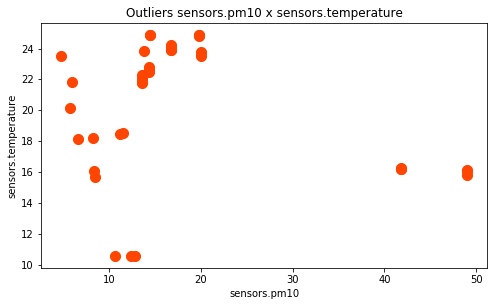

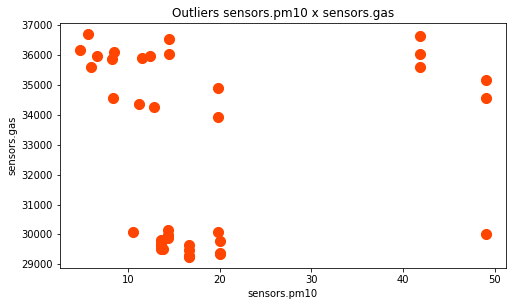

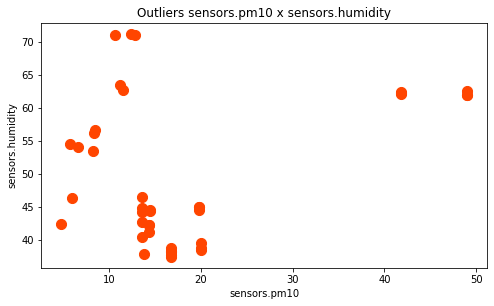

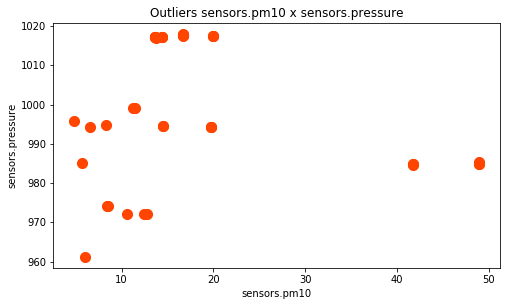

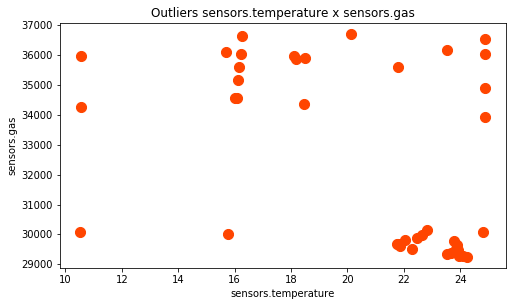

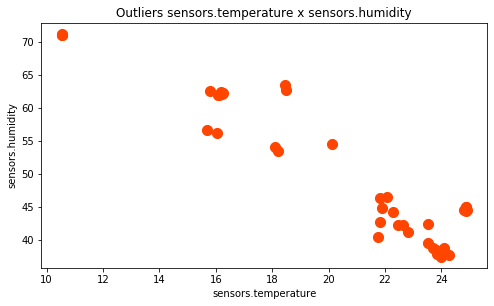

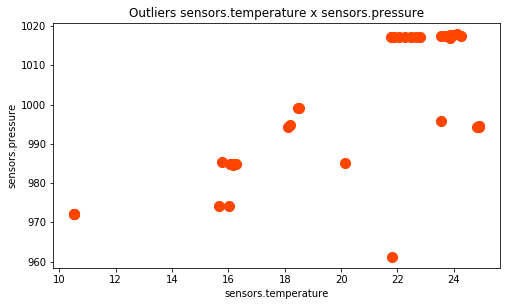

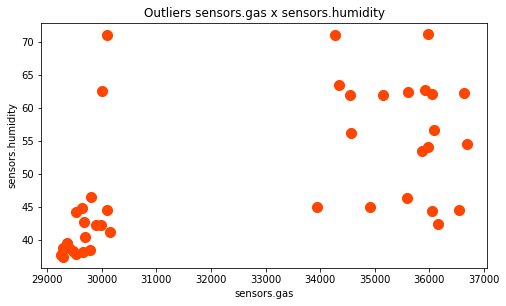

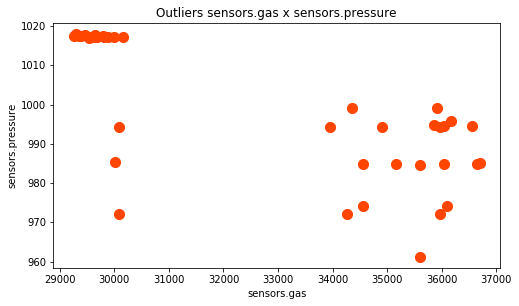

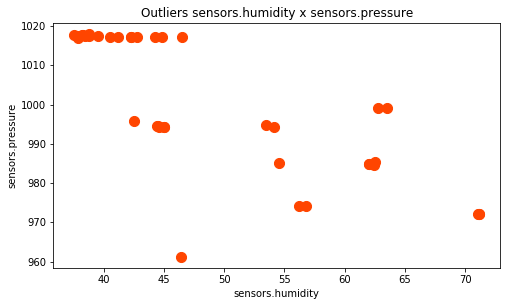

In [12]:
#Plot dos dados
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if (c1 >= c2):
            ;
        else:
            plt.figure(figsize=(8,4.5))
            plt.title('Outliers ' + str(col1) + ' x ' + str(col2))
            #plt.scatter(X_LofData[col1], X_LofData[col2], s = 100, c = 'lightgreen', label = 'Normal')
            plt.scatter(lof_OutVal[col1],lof_OutVal[col2], s = 102, c = 'orangered', label = 'Anomalias')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [13]:
#Substituição dos valores normais e anomalias por 0 e 1
lof_train_pred[lof_train_pred == 1] = 0
lof_train_pred[lof_train_pred == -1] = 1

show_results(y_true=Y_LofData,y_pred=lof_train_pred)

=============Results=============
Accuracy =>  0.9477124183006536
Precision =>  0.0
Mean Absolute Error => 0.05228758169934641
Mean Squared Error => 0.05228758169934641
Root Mean Squared Error => 0.2286647801900118
Classification Matrix :
[[1450   40]
 [  40    0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1490
           1       0.00      0.00      0.00        40

    accuracy                           0.95      1530
   macro avg       0.49      0.49      0.49      1530
weighted avg       0.95      0.95      0.95      1530



#### d. Model Saving 

In [66]:
filename = 'model_saves/lof.sav'
pickle.dump(localOutFact , open(filename, 'wb'))

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

In [14]:
isodata = data
train, test = train_test_split(isodata, test_size=.2) 
train_normal = train[train['sensors.classification']==0] 
train_outliers = train[(train['sensors.classification']==1)]
outlier_prop = len(train_outliers) / len(train_normal)
train_y = train_normal['sensors.classification']
train_normal = train_normal.drop('sensors.classification',axis=1)
test_y = test['sensors.classification']
test = test.drop('sensors.classification',axis=1)
outlier_prop

0.3327702702702703

#### b. Model Trainig

In [15]:
isoForest = IsolationForest(n_estimators = 64, max_samples = 'auto', contamination = outlier_prop, max_features = 3, behaviour = 'new')
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
isoForest.fit(train_normal)

scores = isoForest.decision_function(train_normal)

#### c. Output results

In [16]:
#y_pred_train = model.predict(X_train)
isoForest_y_pred = isoForest.predict(test)

#print(y_pred_train) #anomalias = -1
print(isoForest_y_pred)

[ 1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1
 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1
 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1
  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1 -1
 -1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1  1
 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1
  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1
 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1
 -1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1

(array([  3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  17,  21,
        24,  26,  28,  29,  34,  38,  39,  40,  47,  48,  49,  50,  52,
        54,  57,  58,  62,  65,  67,  68,  70,  71,  72,  73,  75,  76,
        79,  80,  82,  83,  85,  86,  88,  89,  93,  95,  99, 100, 102,
       103, 104, 105, 106, 107, 110, 111, 114, 115, 116, 117, 118, 119,
       120, 122, 123, 124, 125, 129, 131, 134, 135, 136, 138, 140, 143,
       144, 145, 147, 149, 150, 152, 155, 157, 158, 160, 161, 163, 167,
       168, 169, 171, 176, 179, 180, 185, 186, 189, 192, 193, 197, 202,
       203, 204, 205, 210, 212, 213, 219, 223, 226, 227, 229, 232, 234,
       235, 236, 240, 243, 245, 247, 249, 250, 251, 256, 257, 260, 261,
       262, 263, 264, 265, 269, 270, 272, 273, 275, 277, 278, 279, 283,
       287, 288, 290, 292, 295, 296, 298, 299, 301, 303, 304, 307, 308,
       309, 310, 312, 314, 315, 316, 317, 319, 322, 325, 328, 331, 332,
       333, 335, 338, 343, 344, 345, 347, 349, 355, 356, 357, 3

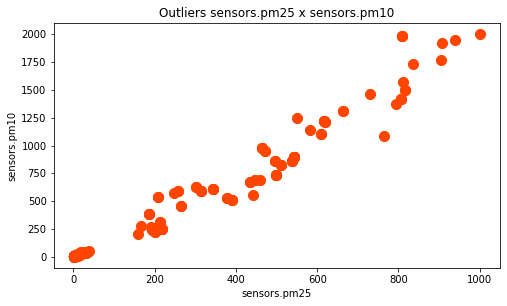

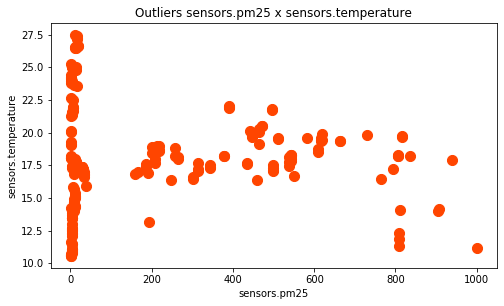

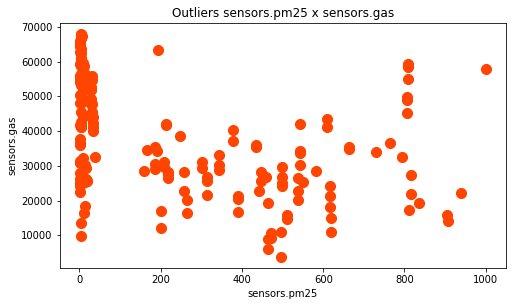

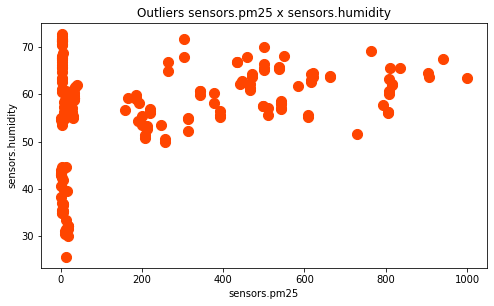

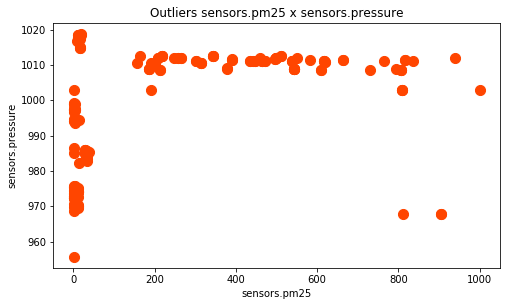

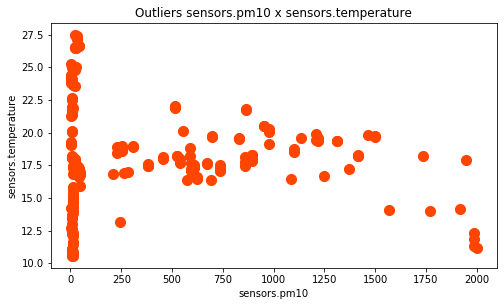

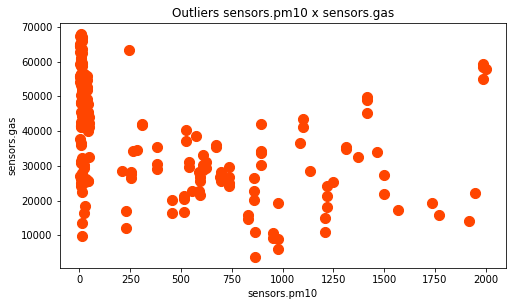

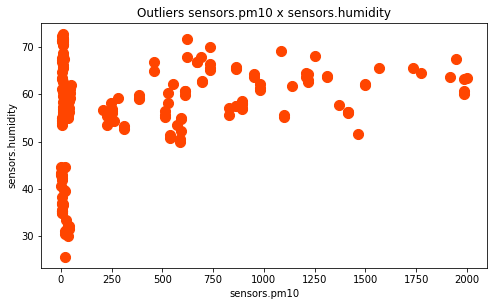

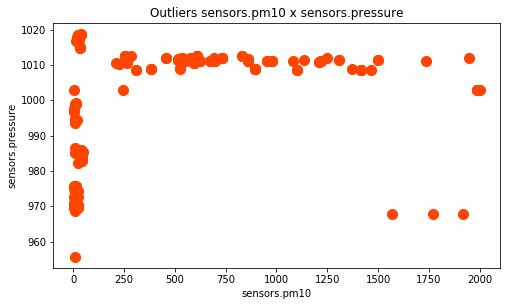

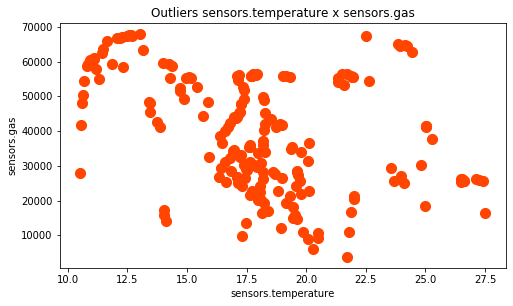

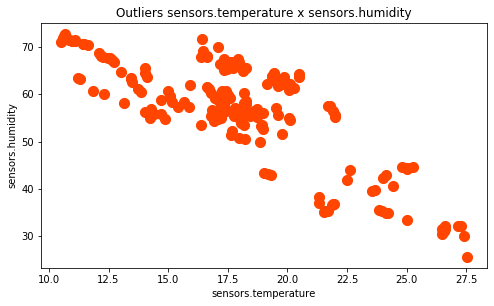

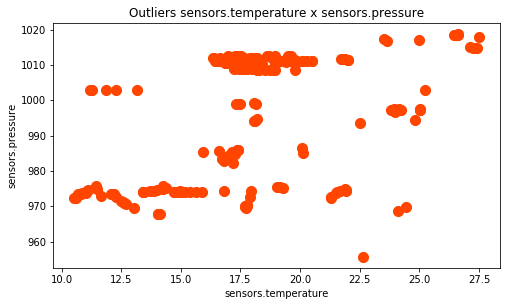

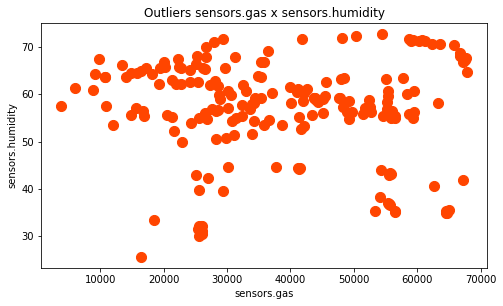

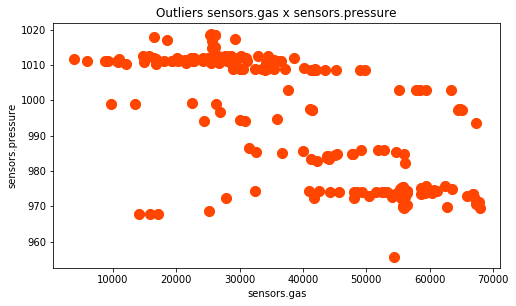

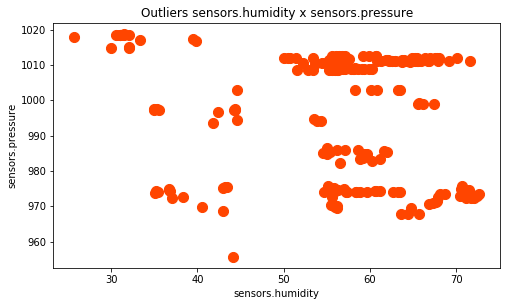

In [17]:
#Anomalias
isoForest_OutIdx = np.where(isoForest_y_pred == -1)
isoForest_OutVal = test.iloc[isoForest_OutIdx]

print(isoForest_OutIdx)

#Plot Outliers Values
for c1, col1 in enumerate(train_normal.columns):
    for c2, col2 in enumerate(train_normal.columns):
        if (c1 >= c2):
            ;
        else:
            plt.figure(figsize=(8,4.5))
            plt.title('Outliers ' + str(col1) + ' x ' + str(col2))
            #plt.scatter(test[col1], test[col2], s = 100, c = 'lightgreen', label = 'Normal')
            plt.scatter(isoForest_OutVal[col1],isoForest_OutVal[col2], s = 102, c = 'orangered', label = 'Anomalias')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [18]:
#Substituição dos valores normais e anomalias por 0 e 1
isoForest_y_pred[isoForest_y_pred == 1] = 0
isoForest_y_pred[isoForest_y_pred == -1] = 1

#Métricas aplicadas aos dados de teste (X_test)
show_results(y_true=test_y,y_pred=isoForest_y_pred)

=============Results=============
Accuracy =>  0.7113924050632912
Precision =>  0.43842364532019706
Mean Absolute Error => 0.28860759493670884
Mean Squared Error => 0.28860759493670884
Root Mean Squared Error => 0.5372221095010041
Classification Matrix :
[[192 114]
 [  0  89]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       306
           1       0.44      1.00      0.61        89

    accuracy                           0.71       395
   macro avg       0.72      0.81      0.69       395
weighted avg       0.87      0.71      0.73       395



#### d. Model Saving 

In [72]:
filename = 'model_saves/isolationforest.sav'
pickle.dump(isoForest, open(filename, 'wb'))

### 4.4 One Class SVM

#### a. Data preparation for input

In [73]:
train, test = train_test_split(data, test_size=.2) 
train_normal = train[train['sensors.classification']==0] 
train_outliers = train[(train['sensors.classification']==1)]
outlier_prop = len(train_outliers) / len(train_normal)
train_y = train_normal['sensors.classification']
train_normal = train_normal.drop('sensors.classification',axis=1)
test_y = test['sensors.classification']
test = test.drop('sensors.classification',axis=1)
outlier_prop

0.3282828282828283

#### b. Model Train

In [74]:
oneClassSVM = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.00001,shrinking=False)
oneClassSVM.fit(train_normal)

OneClassSVM(gamma=1e-05, nu=0.3282828282828283, shrinking=False)

#### c. Output Results

Text(0, 0.5, 'pm10')

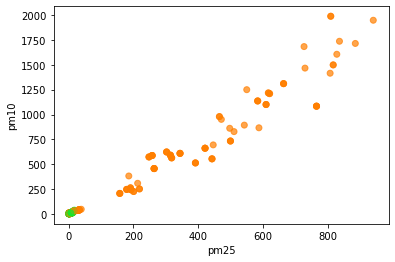

In [75]:
oneclassSVM_pred = oneClassSVM.predict(test)
oneclassSVM_pred[oneclassSVM_pred == 1] = 0
oneclassSVM_pred[oneclassSVM_pred == -1] = 1
colors = np.array(['#18e52a', '#ff7f00']) 
plt.scatter(test['sensors.pm25'] , test['sensors.pm10'] , alpha=0.7, c=colors[oneclassSVM_pred])
plt.xlabel('pm25') 
plt.ylabel('pm10')

In [76]:
show_results(test_y,oneclassSVM_pred)

=============Results=============
Accuracy =>  0.6835443037974683
Precision =>  0.42660550458715596
Mean Absolute Error => 0.31645569620253167
Mean Squared Error => 0.31645569620253167
Root Mean Squared Error => 0.562543950463012
Classification Matrix :
[[177 125]
 [  0  93]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       302
           1       0.43      1.00      0.60        93

    accuracy                           0.68       395
   macro avg       0.71      0.79      0.67       395
weighted avg       0.86      0.68      0.71       395



#### d. Model Saving

In [77]:
filename = 'model_saves/oneclasssvm.sav'
pickle.dump(oneClassSVM, open(filename, 'wb'))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section

### Supervised algorithm

In [39]:
X_sample = X_test
Y_sample = y_test

In [40]:
supervisedModels = {'SVM-Grid': grid,
                    'NeuralNet-Keras' : nn,
                    'NeuralNet2-SKL' : sklNN,
                    'NaiveBayes' : gaussNB,
                    'RandForest' : randForestReg
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in supervisedModels.items():
    tempPreds = model.predict(X_sample)
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds.round())
    tempPrecision = metrics.precision_score(Y_sample, tempPreds.round())
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')
    

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
SVM-Grid	|	1.0	|	1.0	|
NeuralNet-Keras	|	0.99	|	0.99	|
NeuralNet2-SKL	|	1.0	|	1.0	|
NaiveBayes	|	0.98	|	0.92	|
RandForest	|	1.0	|	1.0	|


### Unsupervised algorithms

In [82]:
unsupervisedModels = {'k-means-cluster': kmeans,
                    'isolationForest' : isoForest,
                    'oneClassSVN' : oneClassSVM
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in unsupervisedModels.items():
    tempPreds = model.predict(X_sample)
    if (name == 'isolationForest') or (name == 'oneClassSVN'):
        tempPreds[tempPreds == 1] = 0
        tempPreds[tempPreds == -1] = 1
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds)
    tempPrecision = metrics.precision_score(Y_sample, tempPreds)
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
k-means-cluster	|	0.22	|	0.03	|
isolationForest	|	0.75	|	0.49	|
oneClassSVN	|	0.71	|	0.45	|
